In [1]:
import pandas as pd
import numpy as np
import os
import re
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def main():
    path = '../Characters_directory/'
    characters_dir = os.listdir(path)
    columns = []
    name_entities_dictionary = defaultdict(list)
    for file in characters_dir:
        pattern = r'(.+?)\.'
        name = re.findall(pattern,file)[0]
        columns.append(name)
        f = open(path + file, 'r')
        for line in f.readlines():
            line = line.strip('\n')
            line = line.strip()
            if len(line):
                name_entities_dictionary[name].append(line)

    whole_possible_name_entities_list = []
    for i in name_entities_dictionary.values():
        for j in i:
            whole_possible_name_entities_list.append(j)
    #print(whole_possible_name_entities_list)
    
    return name_entities_dictionary, whole_possible_name_entities_list


if __name__ == '__main__':
    name_entities_dictionary, whole_possible_name_entities_lis = main()

In [3]:
name_entities_dictionary.keys()

dict_keys(['Aberforth_Dumbledore', 'Albus_Dumbledore', 'Argus_Filch', 'Bartemius_Crouch_Jr', 'Bill_William_Arthur_Weasly', 'Character_Names', 'Cho_Chang', 'Cornelius_Oswald_Fudge', 'Dean_Thomas', 'Dobby_Dobby', 'Draco_Malfoy', 'Dudley_Dursley', 'Fred_Weasley', 'George_Weasley', 'Ginny_Weasley', 'Harry_James_Potter', 'Hermione_Jean_Granger', 'Horace_Slughorn', 'Kreacher_Kreacher', 'Ludovic_Bagman', 'Minerva_McGonagall', 'Molly_Weasley', 'Percy_Ignatius_Weasley', 'Ron_Ronald_Weasley', 'Rubeus_Hagrid', 'Severus_Snape', 'Sirius_Black', 'Sybill_Patricia_Trelawney', 'Vernon_Dursley', 'Viktor_Krum', 'Vincent_Crabbe'])

In [4]:
path = "../text_data/sub_berv_obj.csv"
sub_verb_obj = pd.read_csv(path)
sub_verb_obj = pd.DataFrame(sub_verb_obj)
sub_verb_obj.head()

,Unnamed: 0,log_prob,name,obj,span,verb,verse
0,0,-8.941291,McGonagall,Dumbledore,Professor McGonagall shot a sharp look at Dumb...,shot,228
1,1,-10.951256,McGonagall,Dumbledore,that Professor McGonagall had reached the poin...,reached,232
2,2,-7.258025,Dumbledore,Hagrid,"I would trust Hagrid with my life,"" said Dumbl...",said,294
3,3,-8.452874,Dumbledore,Harry,Dumbledore took Harry in his arms and turned t...,took,324
4,4,-7.258025,Hagrid,Sirius,"""Yeah,"" said Hagrid in a very muffled voice, ""...",said,339


In [5]:
new_sub_verb_obj = sub_verb_obj.iloc[:,[2,3,5,6]]
new_sub_verb_obj.head()

,name,obj,verb,verse
0,McGonagall,Dumbledore,shot,228
1,McGonagall,Dumbledore,reached,232
2,Dumbledore,Hagrid,said,294
3,Dumbledore,Harry,took,324
4,Hagrid,Sirius,said,339


In [6]:
#switch df to array for loop later
array_new_sub_verb_obj = new_sub_verb_obj.values
#len(array_new_sub_verb_obj)
array_new_sub_verb_obj

array([['McGonagall', 'Dumbledore', 'shot', 228],
       ['McGonagall', 'Dumbledore', 'reached', 232],
       ['Dumbledore', 'Hagrid', 'said', 294],
       ...,
       ['Ginny', 'James', 'told', 106618],
       ['Harry', 'Albus', 'told', 106637],
       ['Ginny', 'Albus', 'kissed', 106642]], dtype=object)

In [7]:
#find namein the 30 character names' dict
new_array_sub = []

for i in range(len(array_new_sub_verb_obj)):
    name = array_new_sub_verb_obj[i][0]
    
    for key in name_entities_dictionary.keys():
        if name in name_entities_dictionary[key]:
            full_name = key
            array_new_sub_verb_obj[i][0] = full_name
            new_array_sub.append(array_new_sub_verb_obj[i])
            #print(new_array)

len(new_array_sub)  
array_new_sub_verb_obj

array([['Minerva_McGonagall', 'Dumbledore', 'shot', 228],
       ['Minerva_McGonagall', 'Dumbledore', 'reached', 232],
       ['Dumbledore', 'Hagrid', 'said', 294],
       ...,
       ['Ginny_Weasley', 'James', 'told', 106618],
       ['Harry_James_Potter', 'Albus', 'told', 106637],
       ['Ginny_Weasley', 'Albus', 'kissed', 106642]], dtype=object)

In [8]:
new_array_sub[:4]

[array(['Minerva_McGonagall', 'Dumbledore', 'shot', 228], dtype=object),
 array(['Minerva_McGonagall', 'Dumbledore', 'reached', 232], dtype=object),
 array(['Rubeus_Hagrid', 'Sirius', 'said', 339], dtype=object),
 array(['Vernon_Dursley', 'Marge', 'suggested', 451], dtype=object)]

In [9]:
#find obj in the 30 character names' dict
new_array_ojb = []

for i in range(len(new_array_sub)):
    obj = new_array_sub[i][1]
    
    for key in name_entities_dictionary.keys():
        if obj in name_entities_dictionary[key]:
            full_name = key
            new_array_sub[i][1] = full_name
            new_array_ojb.append(new_array_sub[i])
            #print(new_array_ojb)
print(len(new_array_ojb))


1445


In [10]:
new_array_ojb[:5]

[array(['Rubeus_Hagrid', 'Sirius_Black', 'said', 339], dtype=object),
 array(['Vernon_Dursley', 'Harry_James_Potter', 'taken', 477], dtype=object),
 array(['Harry_James_Potter', 'Dudley_Dursley', 'thought', 510],
       dtype=object),
 array(['Vernon_Dursley', 'Dudley_Dursley', 'said', 621], dtype=object),
 array(['Harry_James_Potter', 'Vernon_Dursley', 'was', 676], dtype=object)]

In [11]:
sub_obj_30=pd.DataFrame(new_array_ojb)
sub_obj_30.columns = ['name','obj','verb','verse']
sub_obj_30.head(10)

,name,obj,verb,verse
0,Rubeus_Hagrid,Sirius_Black,said,339
1,Vernon_Dursley,Harry_James_Potter,taken,477
2,Harry_James_Potter,Dudley_Dursley,thought,510
3,Vernon_Dursley,Dudley_Dursley,said,621
4,Harry_James_Potter,Vernon_Dursley,was,676
5,Vernon_Dursley,Harry_James_Potter,roared,704
6,Vernon_Dursley,Harry_James_Potter,did,720
7,Dudley_Dursley,Harry_James_Potter,asked,797
8,Dudley_Dursley,Vernon_Dursley,squeaked,936
9,Vernon_Dursley,Dudley_Dursley,said,968


In [12]:
#book_locations = (pd.DataFrame(content_json)
                  #.reset_index()
                  #.groupby('book_id')['index']
                  #.min()
                  #.to_dict()
                 #)
                    
                    
#原code运行得到的content_json由上面的code直接可以得到下面的location 运行太慢我就直接复制过来了
#找到每本书开头第一句话对应的location值
#含有id 以及第一句话location(verse)值


book_locations={}
book_locations[1]=0
book_locations[2]=6765
book_locations[3]=14597
book_locations[4]=23969
book_locations[5]=42274
book_locations[6]=66082
book_locations[7]=80473
book_locations

{1: 0, 2: 6765, 3: 14597, 4: 23969, 5: 42274, 6: 66082, 7: 80473}

In [13]:
most_frequent_actors = list(sub_obj_30['name'].value_counts().index[:])
len(most_frequent_actors)
#most_frequent_actors

#????变成了27个

27

In [14]:
top_actors_df = sub_obj_30[sub_obj_30['name'].isin(most_frequent_actors)].copy()
len(top_actors_df)

1445

Text(0.5,1,'The order of the top 30 characters shown in seven books ')

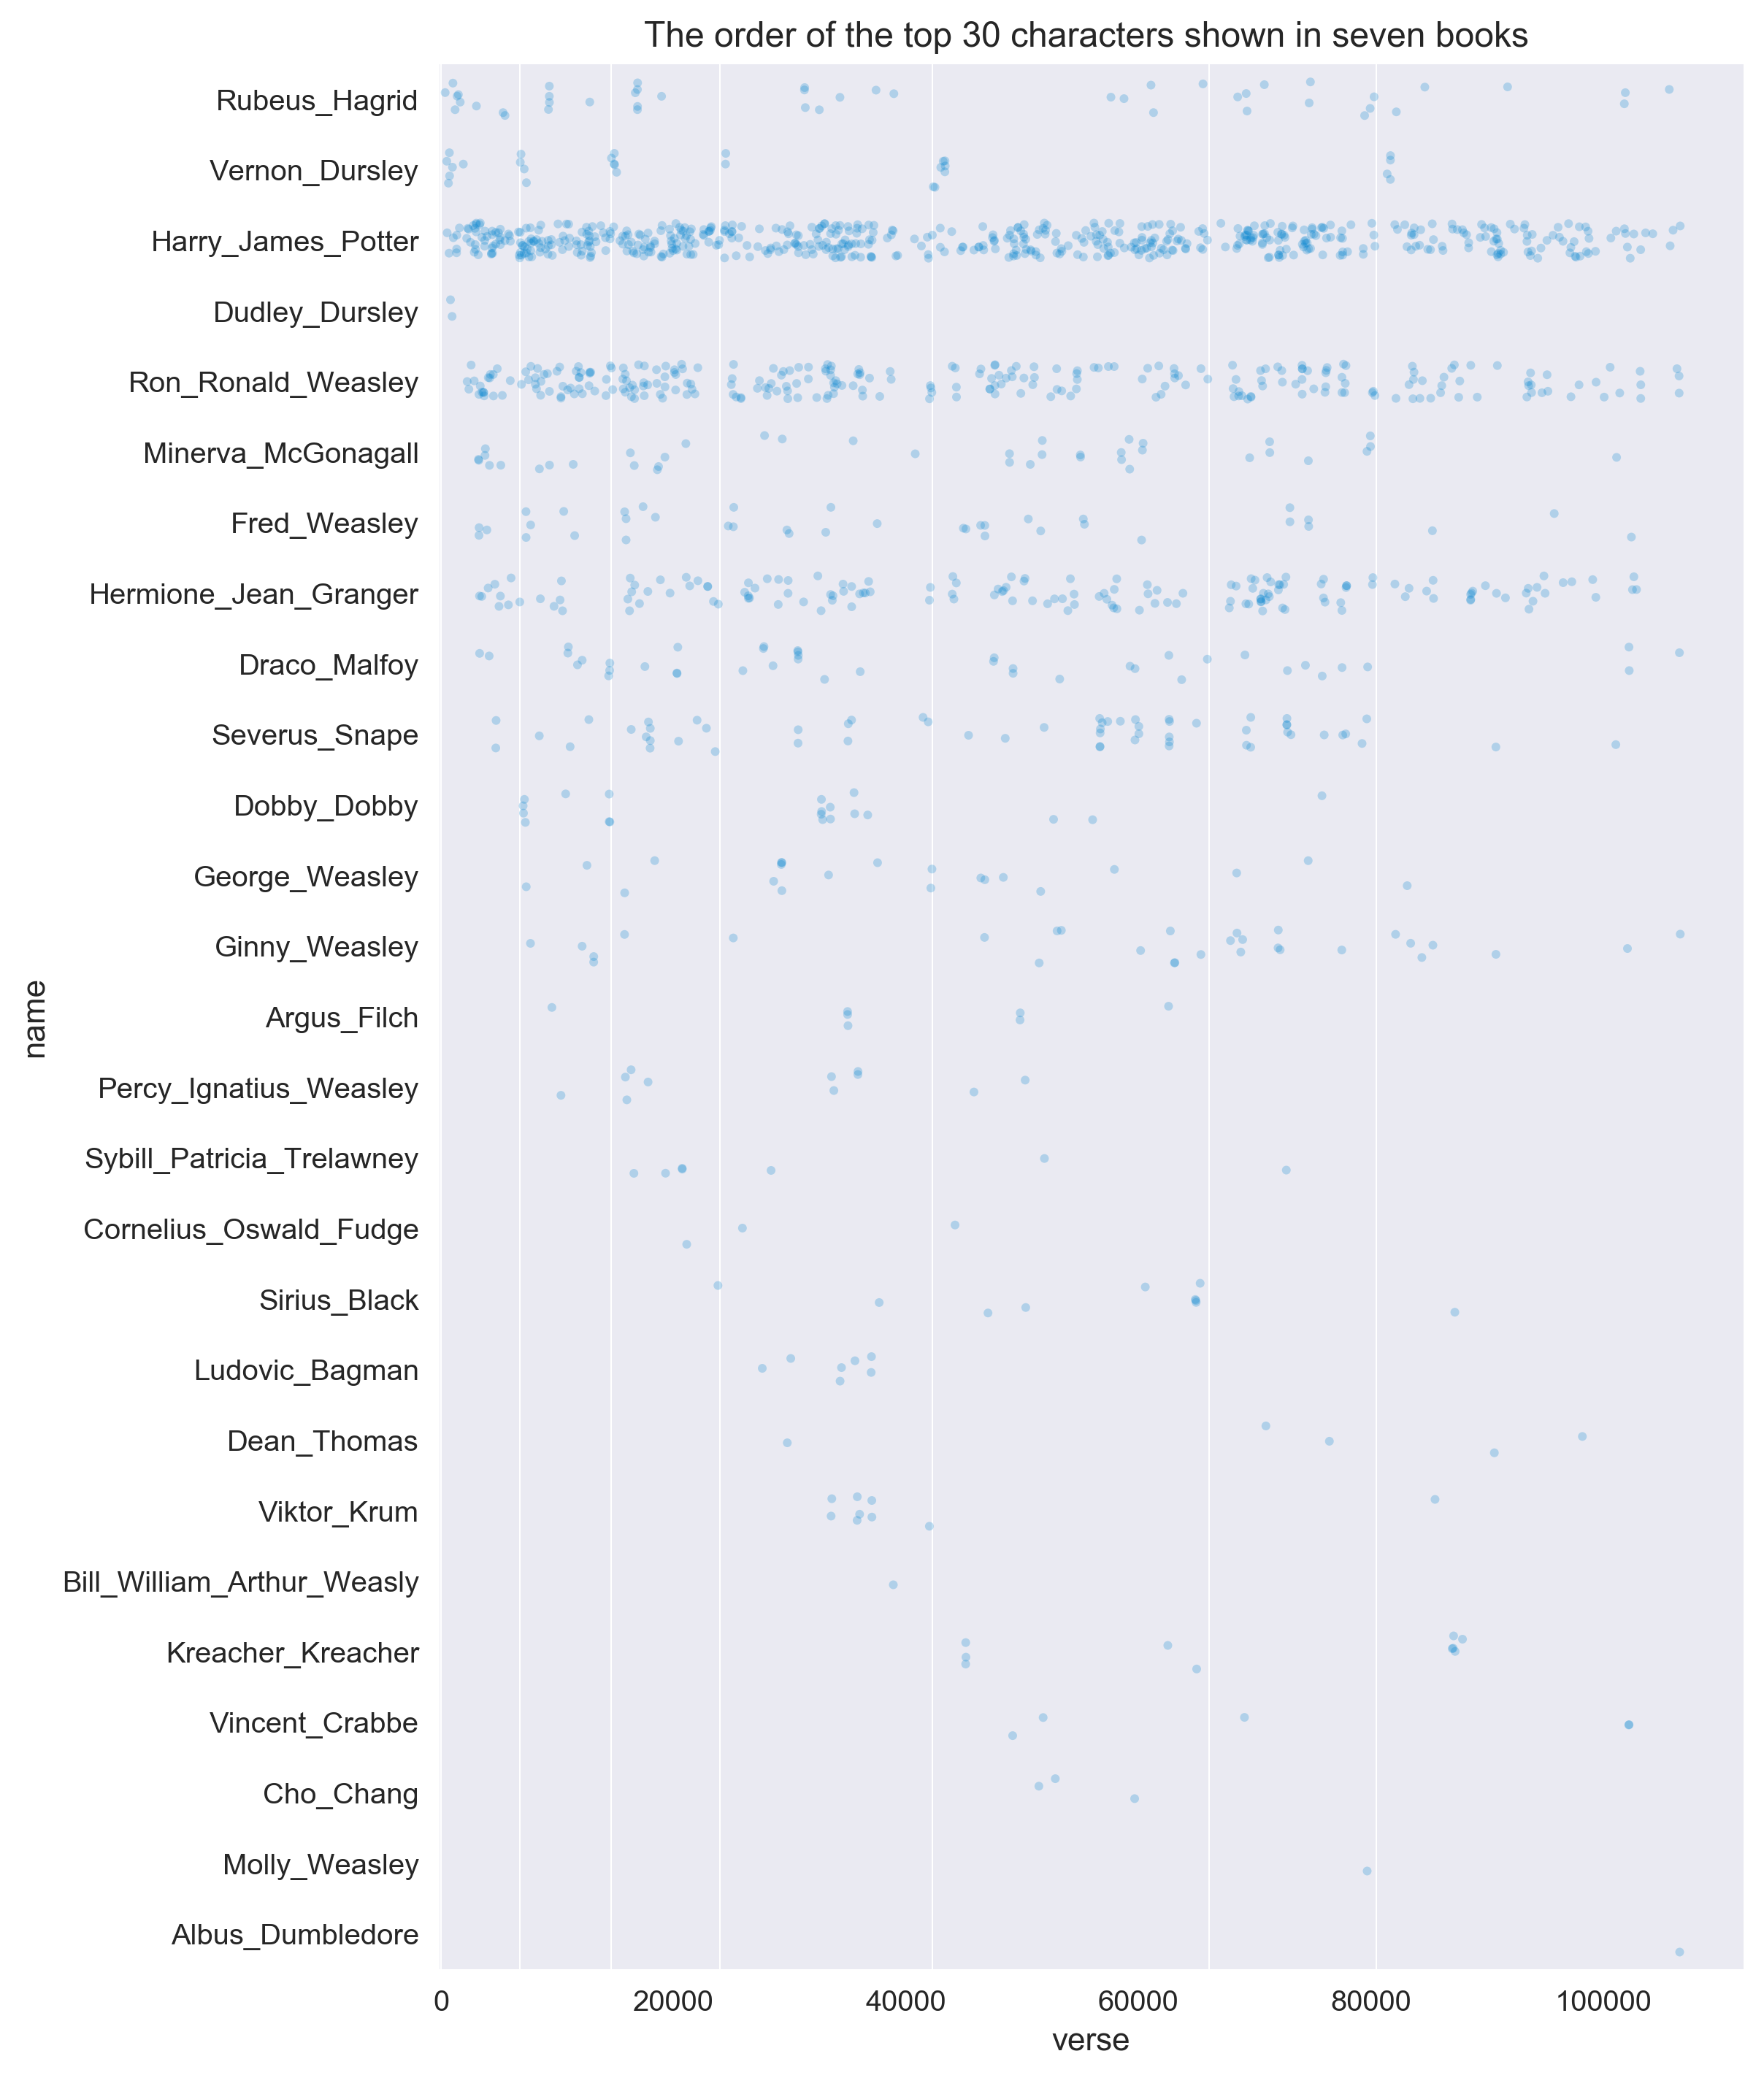

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context='notebook', style='dark')

most_frequent_actors = list(sub_obj_30['name'].value_counts().index[:])
#跟下面一行是一样的 因为合并之后unique 人名个数 <=31
top_actors_df = sub_obj_30
#top_actors_df = sub_obj_30[sub_obj_30['name'].isin(most_frequent_actors)].copy()


fig, ax = plt.subplots(figsize=(8,12), dpi=144*2)

#同一个人名（y轴）出现在不同的verse时期（x轴）
sns.stripplot(x='verse', y='name', 
              data=top_actors_df, ax=ax,
              color='xkcd:cerulean',
              size=3, alpha=0.25, jitter=0.25)

#删除下方跟左边的边框
sns.despine(bottom=True, left=True)

#画垂直线分割每本书
for book, verse_num in book_locations.items():
    ax.axvline(verse_num, alpha=1, lw=0.5, color='w')



ax.set_xlim(left=-150)

ax.set_title("The order of the top 30 characters shown in seven books ")